In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

**Table of contents**<a id='toc0_'></a>    
- 1. [Rede neural de camada única](#toc1_)    
  - 1.1. [Classificador Iris-dataset](#toc1_1_)    
  - 1.2. [Classificador de dígitos 7x7 MNIST](#toc1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Rede neural de camada única](#toc0_)

Dois teste foram realizados na criação de uma rede neural de camada única para problemas multiclass, classificação de flores do dataset Iris e classificação de dígitos escritos a mão do MNIST dataset.

In [37]:
def mse(y, y_pred):
    return ((y-y_pred.T)**2)/2

def mse_derivada(y, y_pred):
    return np.reshape(y, (y_pred.shape)) - y_pred

def sigmoide(x):
    return 1./(1. + np.exp(-x))

def sigmoide_derivada(x):
    y = sigmoide(x)
    return y*(1-y)

In [38]:
class Rede:
    # Inicialização da rede
    def __init__(self, eta=0.1, epochs=50):
        """
        Initializes the neural network object.

        Parameters:
        - eta (float): The learning rate for the neural network. Default is 0.1.
        - epochs (int): The number of training epochs for the neural network. Default is 50.
        """
        self.eta = eta
        self.epochs = epochs
        self.errors = []

    def fit(self, X, y):
        """
        Trains the neural network model using the given input data and labels.

        Parameters:
        - X (array-like): Input data of shape (n_samples, n_features).
        - y (array-like): Target labels of shape (n_samples,).

        Returns:
        None
        """

        m = np.unique(y).size  # qtd. saidas
        n = X.shape[1]  # qtd. entradas
        self.W = np.random.uniform(0, 1, size=(m, n))  # Inicialização da matriz de pesos
        self.B = np.random.uniform(0, 1, size=(m, 1))
        y_dummy = np.eye(m)[y]  # cria dummy de y 

        for ep in range(self.epochs):
            erro_saida = []
            for i, x_i in enumerate(X):
                net = np.dot(self.W, np.reshape(x_i, (n, 1))) + self.B  # saida da rede
                y_pred = sigmoide(net)  # predito pela função de ativação
                delta = mse_derivada(y_dummy[i], y_pred) * sigmoide_derivada(net)  # sigmoide sempre 0 para classificação de imagens
                erro_saida.append(mse(y_dummy[i], y_pred).T)

                # Atualização dos pesos
                self.W += self.eta * -delta * -x_i
                self.B += self.eta * -delta

            self.errors.append(np.mean(erro_saida))
            print(f"Época: {ep+1} | Erro médio: {np.mean(self.errors):.3f}")

    # Predict pela função de ativação sigmoide
    def predict(self, X):
        """
        Predicts the output for the given input.

        Parameters:
        X (array-like): The input data.

        Returns:
        array-like: The predicted output.

        """
        return sigmoide(np.dot(self.W, X.T) + self.B)
    
    def predict_class(self, X):
        """
        Predicts the class label for the given input data.

        Parameters:
        - X: Input data to be classified.

        Returns:
        - The predicted class label.

        """
        return np.argmax(self.predict(X), axis=0)

    def compare(self, y, y_pred):
        """
        Compares the predicted values with the actual values and returns the accuracy.

        Parameters:
        - y: numpy array
            The actual values.
        - y_pred: numpy array
            The predicted values.

        Returns:
        - float
            The accuracy of the predictions.
        """
        return np.sum(y == y_pred) / y.size

    def plot_errors(self):
        """
        Plots the mean squared error over epochs.

        This method plots the mean squared error over the epochs of the neural network training.

        Parameters:
        None

        Returns:
        None
        """
        plt.plot(range(self.epochs), self.errors, '.-')
        plt.title("Erro médio quadrático")
        plt.xlabel("Época")
        plt.ylabel("Erro")
        plt.show()

## 1.1. <a id='toc1_1_'></a>[Classificador Iris-dataset](#toc0_)

Classifica em três diferentes classes com base em quatro variáveis do dataset.

In [27]:
X = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
X = X.rename({4:"classe"}, axis=1)
X["classe"] = X["classe"].map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})
y = X.pop("classe")

In [28]:
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
rede = Rede(0.02, 100)
rede.fit(X_train, y_train)
pred = rede.predict(X_test)

Época: 1 | Erro médio: 0.290
Época: 2 | Erro médio: 0.273
Época: 3 | Erro médio: 0.247
Época: 4 | Erro médio: 0.230
Época: 5 | Erro médio: 0.218
Época: 6 | Erro médio: 0.208
Época: 7 | Erro médio: 0.201
Época: 8 | Erro médio: 0.196
Época: 9 | Erro médio: 0.191
Época: 10 | Erro médio: 0.188
Época: 11 | Erro médio: 0.185
Época: 12 | Erro médio: 0.182
Época: 13 | Erro médio: 0.180
Época: 14 | Erro médio: 0.178
Época: 15 | Erro médio: 0.176
Época: 16 | Erro médio: 0.174
Época: 17 | Erro médio: 0.173
Época: 18 | Erro médio: 0.172
Época: 19 | Erro médio: 0.171
Época: 20 | Erro médio: 0.170
Época: 21 | Erro médio: 0.169
Época: 22 | Erro médio: 0.168
Época: 23 | Erro médio: 0.167
Época: 24 | Erro médio: 0.166
Época: 25 | Erro médio: 0.166
Época: 26 | Erro médio: 0.165
Época: 27 | Erro médio: 0.165
Época: 28 | Erro médio: 0.164
Época: 29 | Erro médio: 0.163
Época: 30 | Erro médio: 0.163
Época: 31 | Erro médio: 0.163
Época: 32 | Erro médio: 0.162
Época: 33 | Erro médio: 0.162
Época: 34 | Erro mé

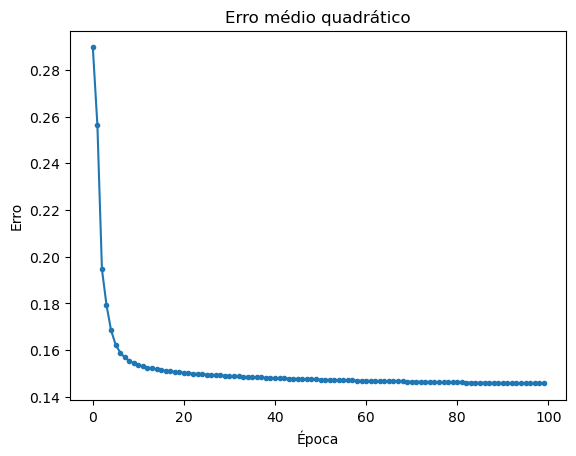

In [30]:
rede.plot_errors()

---

## 1.2. <a id='toc1_2_'></a>[Classificador de dígitos 7x7 MNIST](#toc0_)

Classifica em dez diferentes classes, sendo cada uma delas um dígito de 0 a 9 com base em uma imagem de 7x7 pixels

In [36]:
train7x7 = np.load("data/train7x7.npy")
test7x7 = np.load("data/test7x7.npy")

(_, train_labels7x7), (_, test_labels7x7) = mnist.load_data()

train_images7x7 = np.array([img.flatten() for img in train7x7])
test_images7x7 = np.array([img.flatten() for img in test7x7])

scaler = MinMaxScaler()
train_images7x7 = scaler.fit_transform(train_images7x7.reshape(train_images7x7.shape[0], -1))
test_images7x7 = scaler.fit_transform(test_images7x7.reshape(test_images7x7.shape[0], -1))

In [32]:
rede3 = Rede(eta=0.03, epochs=20)
rede3.fit(train_images7x7[:15000], train_labels7x7[:15000])

Época: 1 | Erro médio: 0.133
Época: 2 | Erro médio: 0.114
Época: 3 | Erro médio: 0.109
Época: 4 | Erro médio: 0.106
Época: 5 | Erro médio: 0.104
Época: 6 | Erro médio: 0.103
Época: 7 | Erro médio: 0.103
Época: 8 | Erro médio: 0.102
Época: 9 | Erro médio: 0.102
Época: 10 | Erro médio: 0.101
Época: 11 | Erro médio: 0.101
Época: 12 | Erro médio: 0.101
Época: 13 | Erro médio: 0.101
Época: 14 | Erro médio: 0.101
Época: 15 | Erro médio: 0.101
Época: 16 | Erro médio: 0.101
Época: 17 | Erro médio: 0.101
Época: 18 | Erro médio: 0.100
Época: 19 | Erro médio: 0.100
Época: 20 | Erro médio: 0.100


In [33]:
y_pred_class = rede3.predict_class(test_images7x7)
acc = rede3.compare(test_labels7x7, y_pred_class)
print(acc)

0.4282


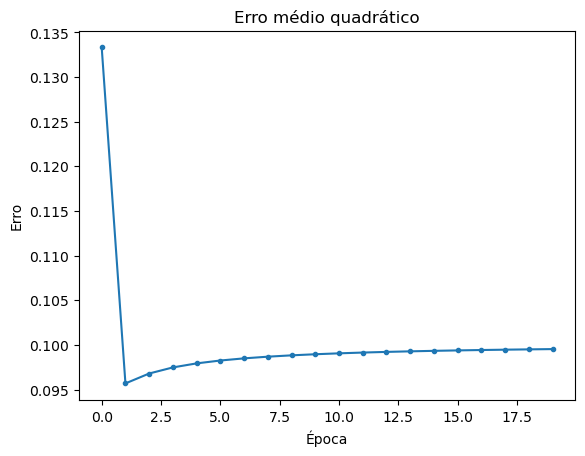

In [34]:
rede3.plot_errors()